In [1]:
import sqlite3
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
from matplotlib.ticker import FuncFormatter

In [3]:
index_type = 'alex'
NS_TO_MS = 1 / 1e6
NS_TO_S = 1 / 1e9

In [4]:
with sqlite3.connect("../results.db") as con:
    df = pd.read_sql(f"SELECT * FROM bliss_bench WHERE index_type = '{index_type}'", con)

In [5]:
df.describe()

,id,k_pt,l_pt,preload_time,write_time,mixed_time,read_time
count,59.000000,59.000000,59.000000,5.900000e+01,5.900000e+01,5.900000e+01,5.900000e+01
mean,33.559322,12.677966,16.186441,8.001734e+10,4.156911e+10,2.822821e+10,7.247260e+09
std,22.265073,18.840017,20.306679,1.964301e+10,1.112697e+10,5.723978e+09,3.613009e+08
min,1.000000,0.000000,0.000000,5.090905e+10,2.687647e+10,1.991222e+10,6.104482e+09
25%,15.500000,3.000000,3.000000,6.910412e+10,3.430514e+10,2.440573e+10,7.090281e+09
50%,30.000000,5.000000,5.000000,7.603921e+10,3.855351e+10,2.660267e+10,7.340359e+09
75%,50.000000,10.000000,25.000000,8.655303e+10,4.480687e+10,2.987271e+10,7.482062e+09
max,79.000000,100.000000,100.000000,1.334365e+11,7.562598e+10,4.580711e+10,7.897337e+09


In [6]:
def plot_heatmap(df: pd.DataFrame, value: str = 'preload_time', fillna=True, **heatmap_kwargs):
    labels = {'preload_time': 'Preload Time (s)', 'write_time': 'Write Op Time (s)', 'mixed_time': 'Mixed Op Time (s)', 'read_time': 'Read Op Time(s)'}
    data = df.pivot_table(index='k_pt', columns='l_pt', values=value, aggfunc='mean')
    data = data * NS_TO_S
    if fillna:
        data.iloc[-1] = data.iloc[-1].fillna(data.iloc[-1][100])
        data.loc[:, 100] = data.loc[:, 100].fillna(data.iloc[-1][100])
        data.loc[0, :] = data.loc[0][0]
        data.loc[:, 0] = data.loc[0][0]
    
    ax = sns.heatmap(data, cmap='viridis', cbar_kws={'label': labels.get(value, 'Time (s)')}, **heatmap_kwargs)
    _ = ax.invert_yaxis()
    _ = ax.set(xticklabels=data.columns.map(int), yticklabels=data.index.map(int))
    _ = ax.set(xlabel='L', ylabel='K')
    
    return ax, data

In [7]:
heatmap_kwargs = {'annot': True, 'fmt': '.0f'}

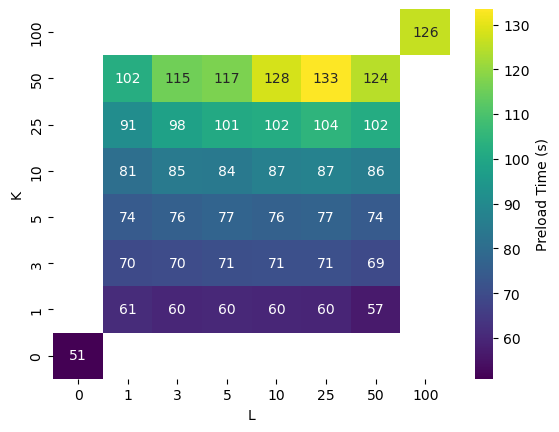

In [8]:
ax, data = plot_heatmap(df, value='preload_time', fillna=False, **heatmap_kwargs)

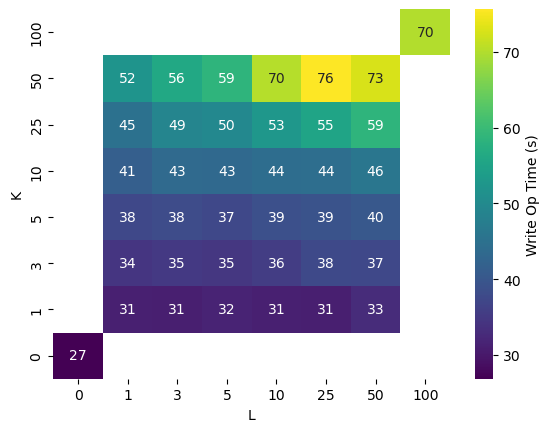

In [9]:
ax, data = plot_heatmap(df, value='write_time', fillna=False, **heatmap_kwargs)

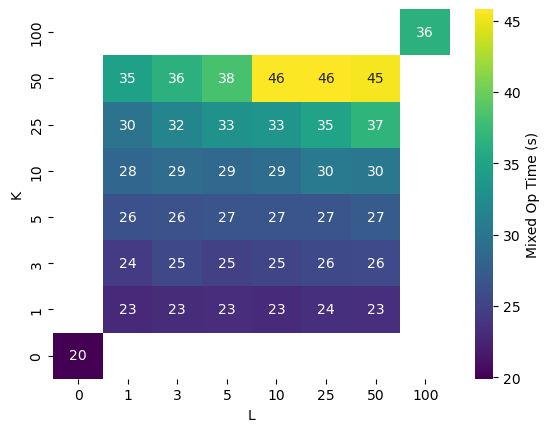

In [10]:
ax, data = plot_heatmap(df, value='mixed_time', fillna=False, **heatmap_kwargs)

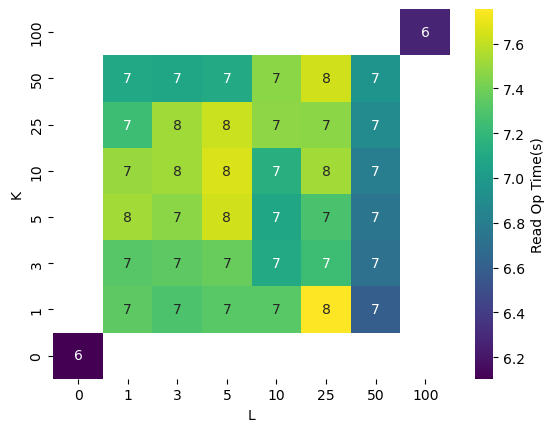

In [11]:
ax, data = plot_heatmap(df, value='read_time', fillna=False, **heatmap_kwargs)